In [1]:
# Import all libraries within this cell to avoid redundancy later on.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('fake_job_postings.csv')
dataset = dataset.fillna(value = 'Unspecified')
dataset = dataset.replace({'HR':'Human Resources', 'R&D':'Research and Development'})

In [3]:
dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Unspecified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unspecified,0,1,0,Other,Internship,Unspecified,Unspecified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unspecified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unspecified,Unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unspecified,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unspecified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unspecified,Unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


0    17014
1      866
Name: fraudulent, dtype: int64

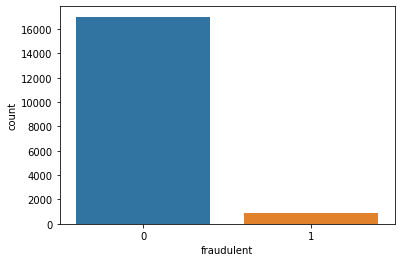

In [4]:
sb.countplot(dataset['fraudulent'])
dataset['fraudulent'].value_counts()

In [5]:
Data1 = pd.DataFrame(dataset[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function", "fraudulent"]])
Data1.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,Unspecified,Unspecified,Marketing,0
1,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0
2,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
print(Data1.dtypes)

telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [7]:
Data1['employment_type'] = Data1['employment_type'].astype('category')
Data1['required_experience'] = Data1['required_experience'].astype('category')
Data1['required_education'] = Data1['required_education'].astype('category')
Data1['industry'] = Data1['industry'].astype('category')
Data1['function'] = Data1['function'].astype('category')

In [8]:
print(Data1.dtypes)

telecommuting             int64
has_company_logo          int64
has_questions             int64
employment_type        category
required_experience    category
required_education     category
industry               category
function               category
fraudulent                int64
dtype: object


In [9]:
Data1.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


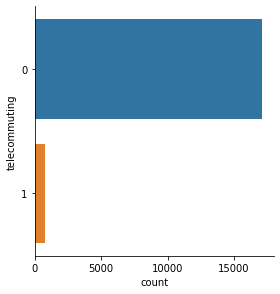

In [10]:
sb.catplot(y = 'telecommuting', data = Data1, kind = "count", height = 4)

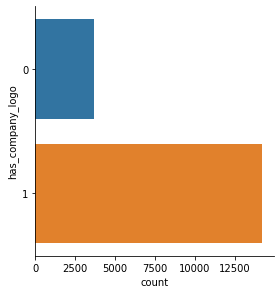

In [11]:
sb.catplot(y = 'has_company_logo', data = Data1, kind = "count", height = 4)

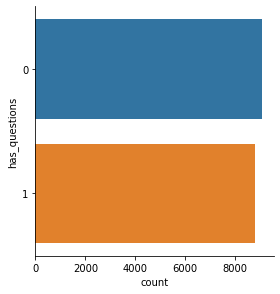

In [12]:
sb.catplot(y = 'has_questions', data = Data1, kind = "count", height = 4)

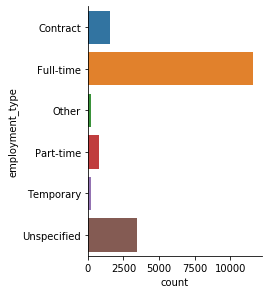

In [13]:
sb.catplot(y = 'employment_type', data = Data1, kind = "count", height = 4)

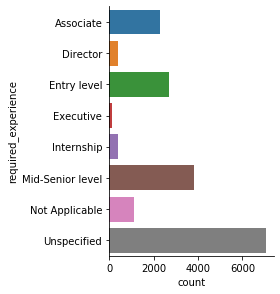

In [14]:
sb.catplot(y = 'required_experience', data = Data1, kind = "count", height = 4)

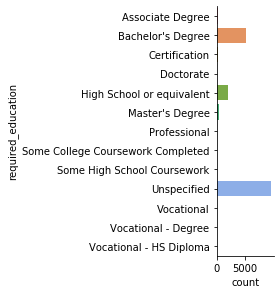

In [15]:
sb.catplot(y = 'required_education', data = Data1, kind = "count", height = 4)

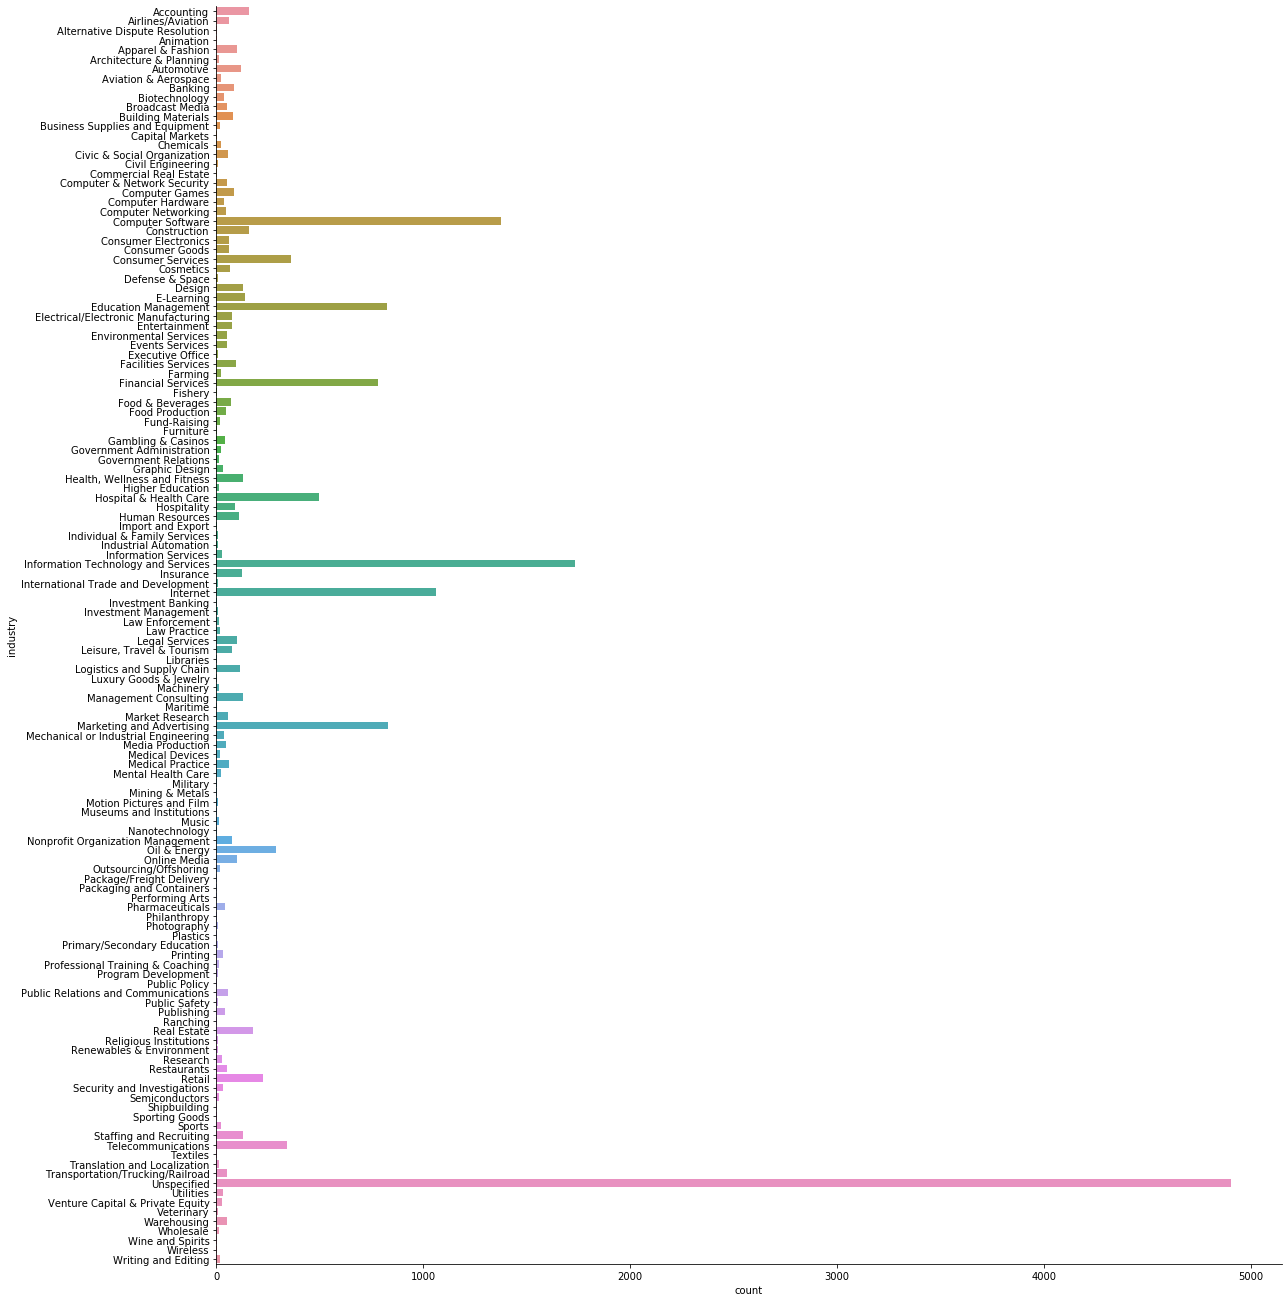

In [16]:
sb.catplot(y = 'industry', data = Data1, kind = "count", height = 18)

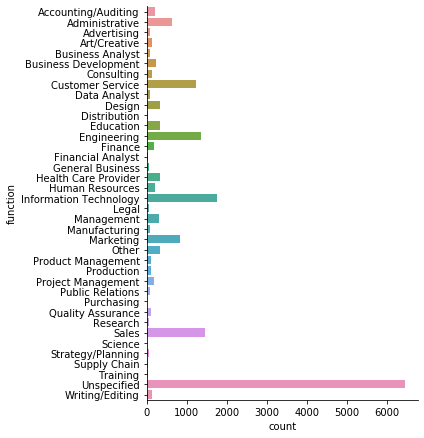

In [17]:
sb.catplot(y = 'function', data = Data1, kind = "count", height = 6)

# Check the Relationship amongst Variables

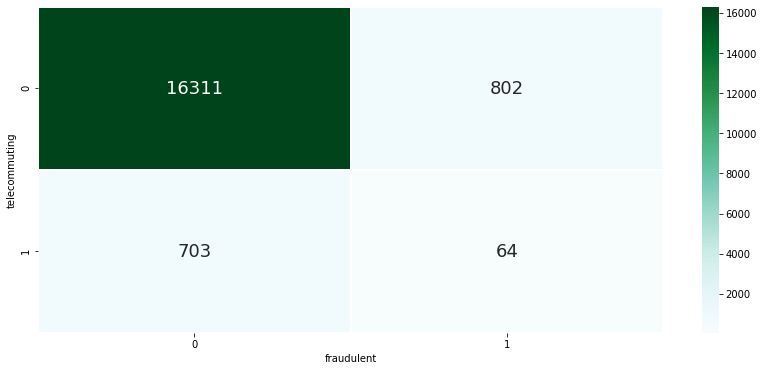

In [18]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.heatmap(Data1.groupby(['telecommuting', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

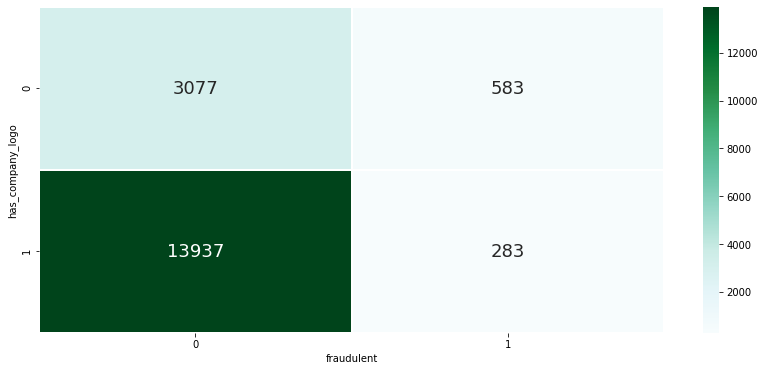

In [19]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.heatmap(Data1.groupby(['has_company_logo', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

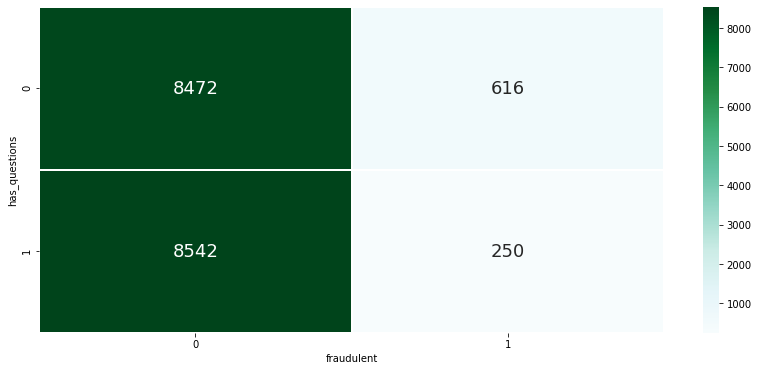

In [20]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.heatmap(Data1.groupby(['has_questions', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

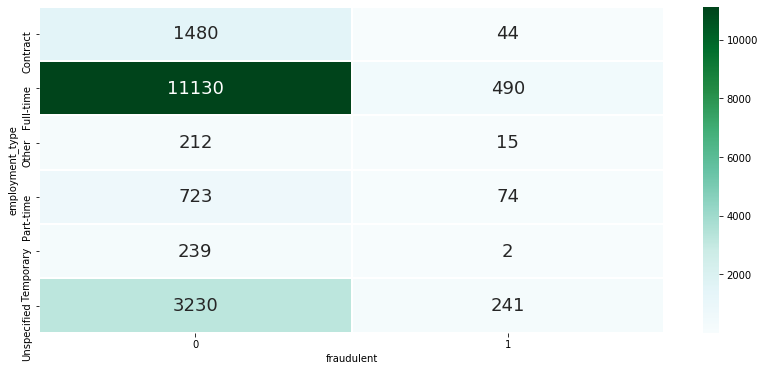

In [21]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.heatmap(Data1.groupby(['employment_type', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

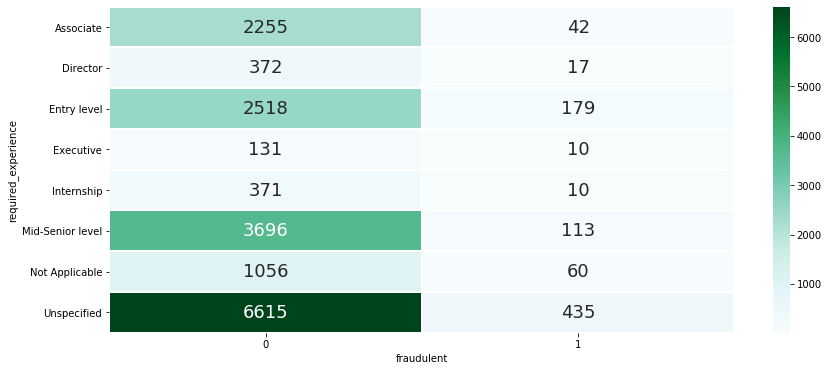

In [22]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.heatmap(Data1.groupby(['required_experience', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

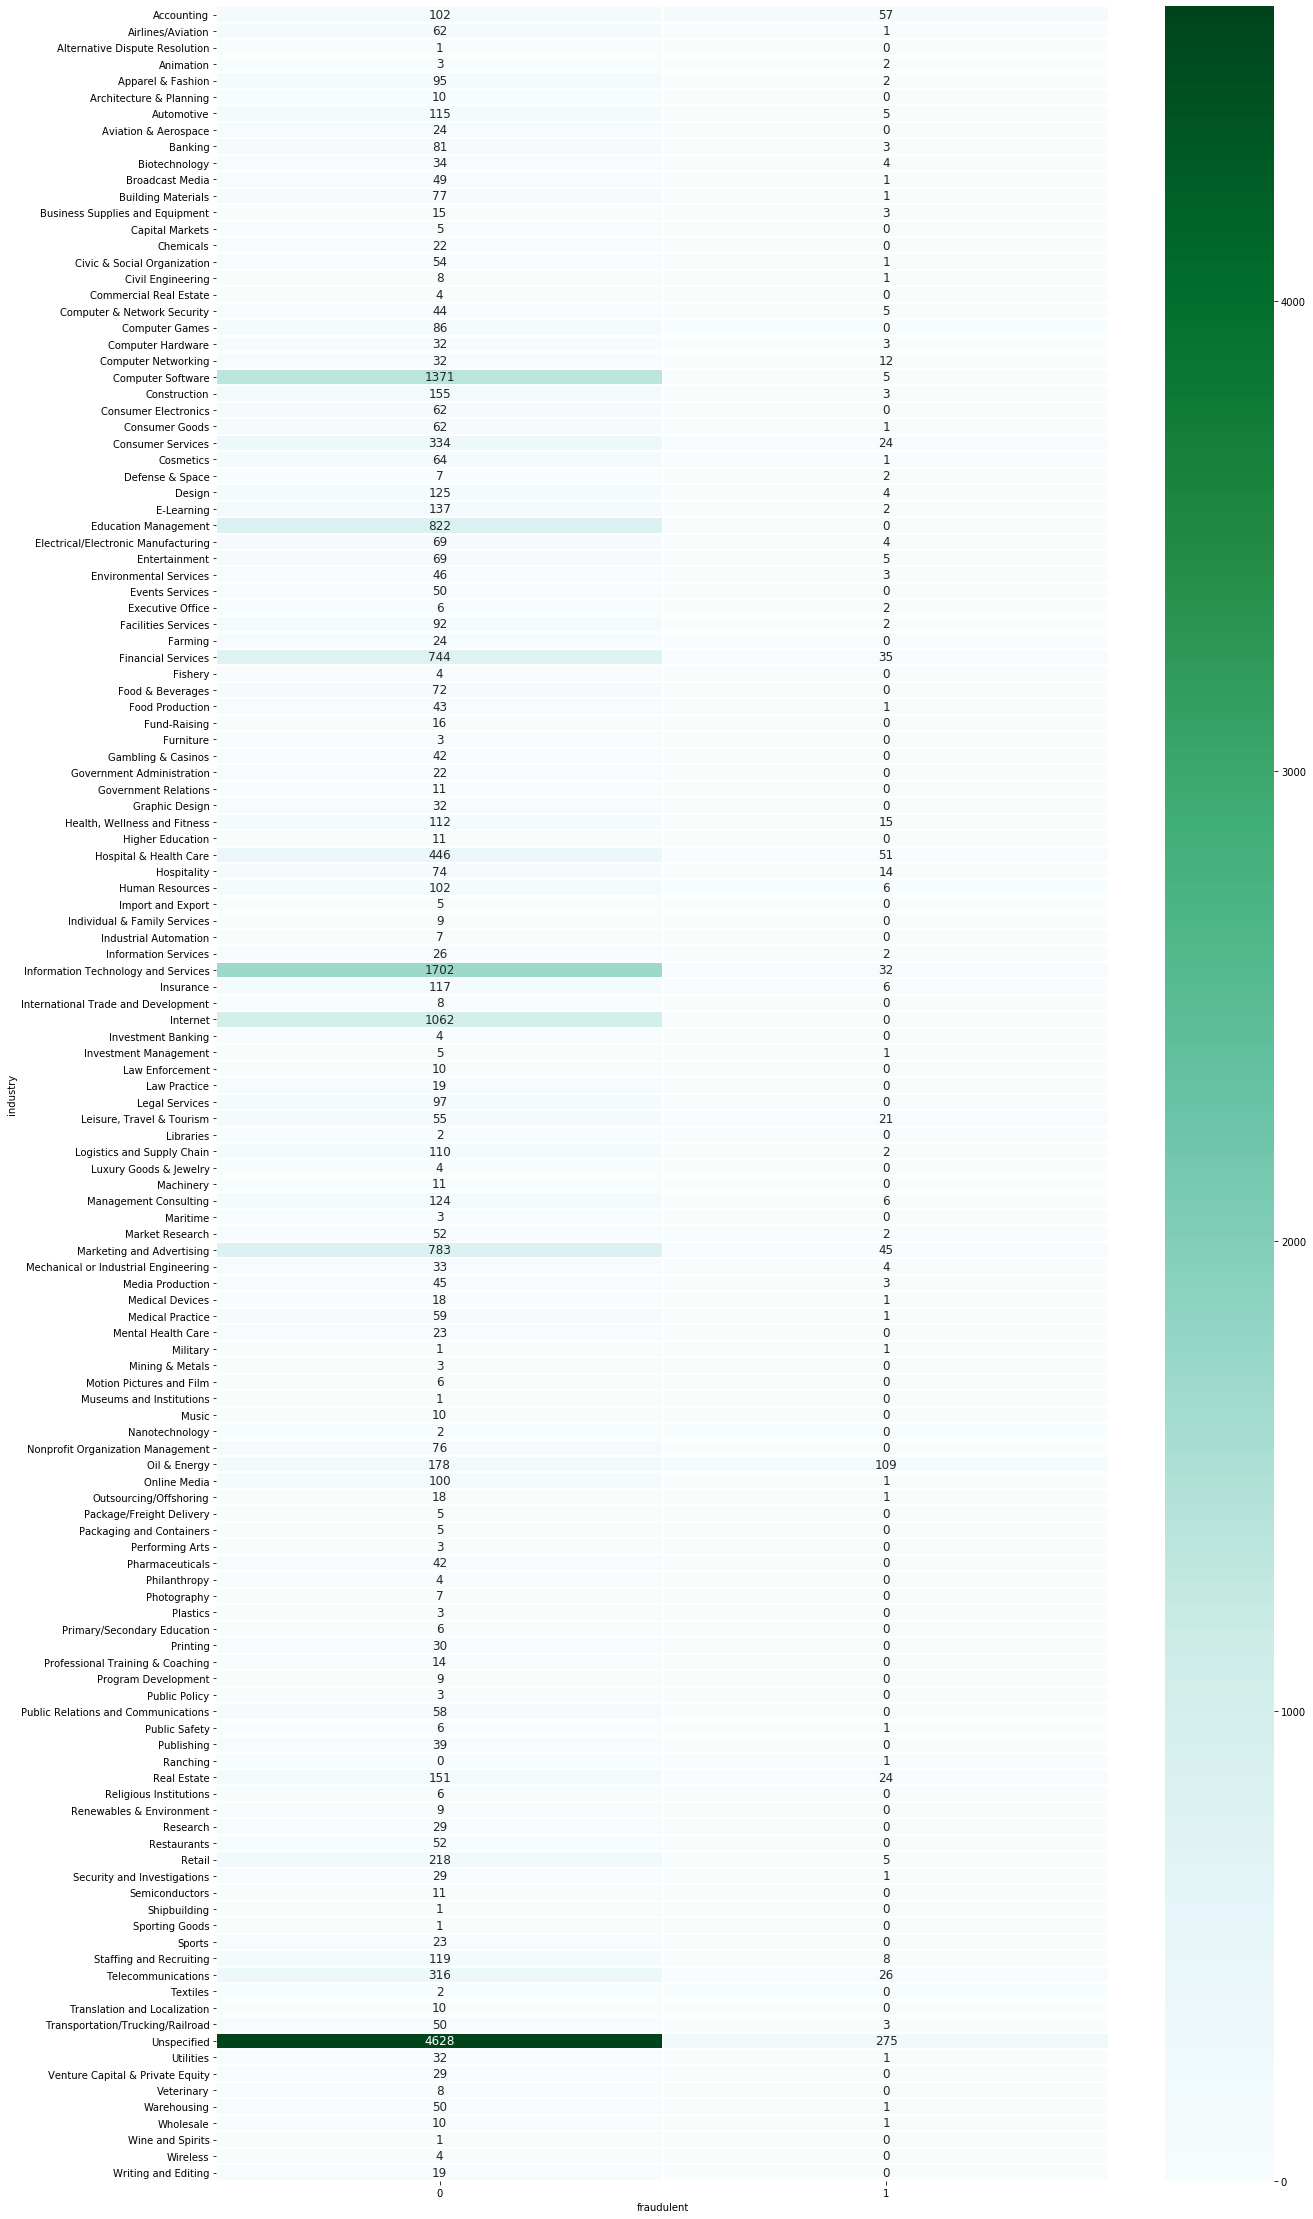

In [23]:
f, axes = plt.subplots(1, 1, figsize=(20, 40))
sb.heatmap(Data1.groupby(['industry', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn")

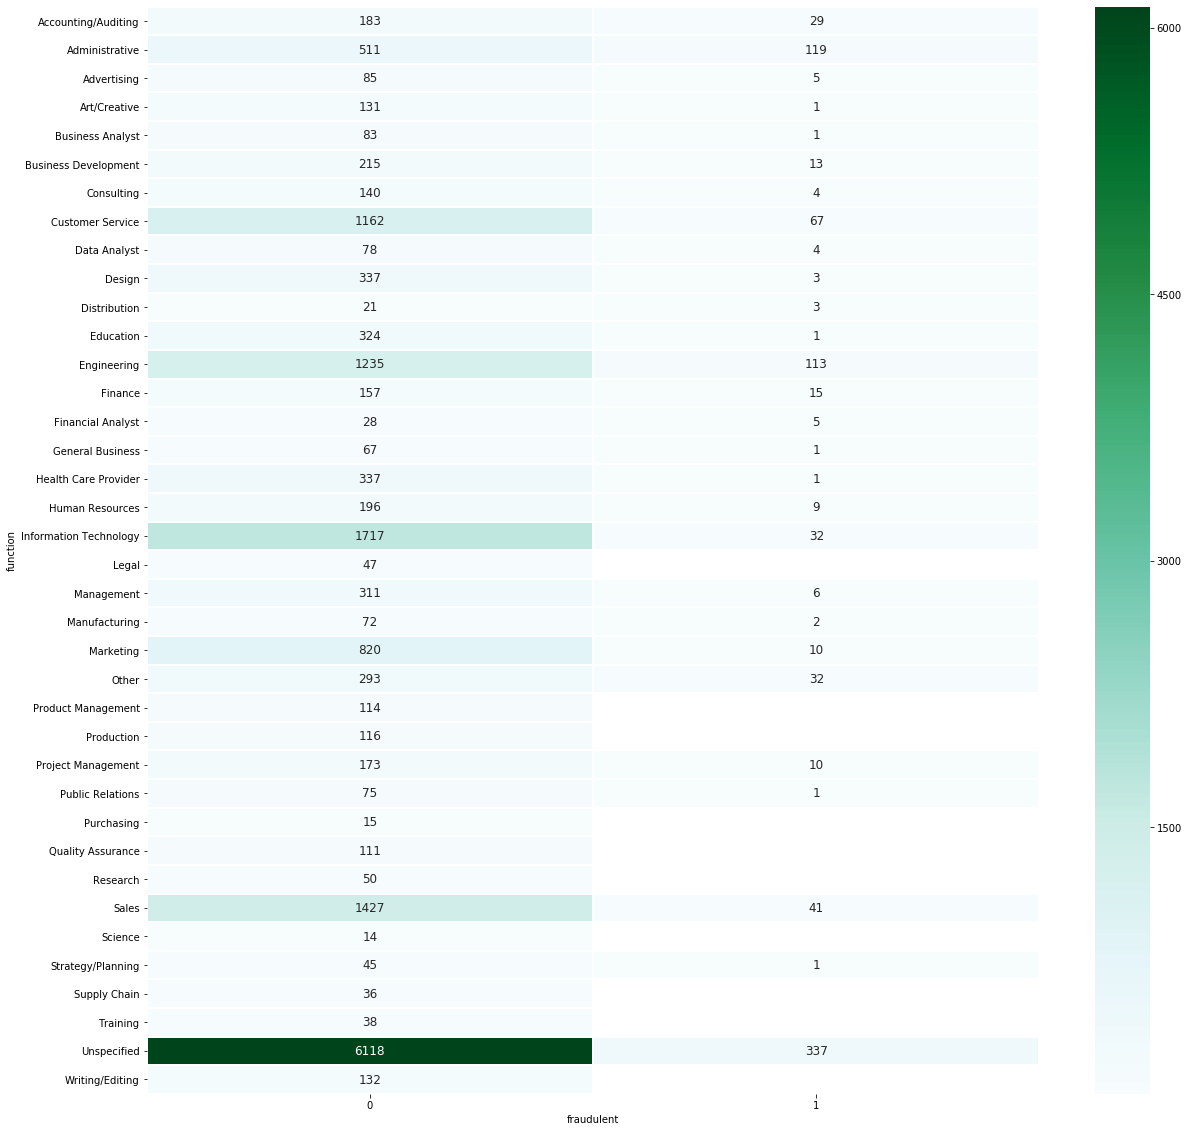

In [73]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(Data1.groupby(['function', 'fraudulent']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12}, cmap = "BuGn")

Base on the Variable relations we can say that the fake jobs is normally contributed in the Full time section and ......